In [641]:
import pandas as pd
import numpy as np

In [642]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [643]:
data=pd.read_csv("PBP_21-22_Reg.csv")

In [644]:
data=data.drop(columns="Unnamed: 0")

In [645]:
data.head()

,actionNumber,clock,timeActual,period,periodType,actionType,subType,qualifiers,personId,x,...,foulTechnicalTotal,foulDrawnPlayerName,foulDrawnPersonId,turnoverTotal,stealPlayerName,stealPersonId,blockPlayerName,blockPersonId,gameid,value
0,2,PT12M00.00S,2022-01-30T18:11:20.4Z,1,REGULAR,period,start,[],0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100751,NaN
1,4,PT11M56.00S,2022-01-30T18:11:24.0Z,1,REGULAR,jumpball,recovered,[],203076,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100751,NaN
2,7,PT11M35.00S,2022-01-30T18:11:43.8Z,1,REGULAR,2pt,Jump Shot,['pointsinthepaint'],203076,17.033509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100751,NaN
3,8,PT11M32.00S,2022-01-30T18:11:46.8Z,1,REGULAR,rebound,defensive,[],203991,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100751,NaN
4,9,PT11M17.00S,2022-01-30T18:12:02.1Z,1,REGULAR,2pt,Layup,['pointsinthepaint'],1628381,93.117608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100751,NaN


In [646]:
# We separate the minutes from the clock columns
data['minutes']=data["clock"].apply(lambda x: int(x[2:4]))

In [647]:
# We want to take out overtime periods
data=data[data["periodType"]=="REGULAR"]

In [648]:
data

,actionNumber,clock,timeActual,period,periodType,actionType,subType,qualifiers,personId,x,...,foulDrawnPlayerName,foulDrawnPersonId,turnoverTotal,stealPlayerName,stealPersonId,blockPlayerName,blockPersonId,gameid,value,minutes
0,2,PT12M00.00S,2022-01-30T18:11:20.4Z,1,REGULAR,period,start,[],0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100751,NaN,12
1,4,PT11M56.00S,2022-01-30T18:11:24.0Z,1,REGULAR,jumpball,recovered,[],203076,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100751,NaN,11
2,7,PT11M35.00S,2022-01-30T18:11:43.8Z,1,REGULAR,2pt,Jump Shot,['pointsinthepaint'],203076,17.033509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100751,NaN,11
3,8,PT11M32.00S,2022-01-30T18:11:46.8Z,1,REGULAR,rebound,defensive,[],203991,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100751,NaN,11
4,9,PT11M17.00S,2022-01-30T18:12:02.1Z,1,REGULAR,2pt,Layup,['pointsinthepaint'],1628381,93.117608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100751,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423746,689,PT00M11.30S,2021-10-20T01:56:43.5Z,4,REGULAR,turnover,shot clock,['team'],0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100001,NaN,0
423747,690,PT00M00.00S,2021-10-20T01:57:01.1Z,4,REGULAR,3pt,Jump Shot,['fromturnover'],201949,34.379106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100001,NaN,0
423748,691,PT00M00.00S,2021-10-20T01:57:03.6Z,4,REGULAR,rebound,offensive,['team'],0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100001,NaN,0
423749,692,PT00M00.00S,2021-10-20T01:57:11.1Z,4,REGULAR,period,end,[],0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22100001,NaN,0


### First thing we'd like to check is whether there is any pattern in scoring in each minute
####  For this, we're going to create a metric to count points per minute for each quarter and calculate the average points per minute (ppm) for each minute

In [649]:
# We add a total score column
data["total_score"]=data["scoreHome"]+data["scoreAway"]

In [650]:
# We calculate how many minutes are left in the game for each row
data["minutes_remaining"]=48-(12-data["minutes"]+12*(data["period"]-1))

In [651]:
# We create a dataframe to store the points per minute for each minute in each game
ppms=pd.DataFrame(index=data["gameid"].unique(),columns=data["minutes_remaining"].unique())

for i in data["gameid"].unique():
    for j in data["minutes_remaining"].unique():
        ppms.loc[i,j]=data[(data["gameid"]==i) & (data["minutes_remaining"]==j)].iloc[len(data[(data["gameid"]==i) & (data["minutes_remaining"]==j)])-1,-2]

In [652]:
# This dataframe has the cumulative ppms for every game but we need the individual ones per minute
for i in range(len(ppms.columns)-1):
    ppms[i]=ppms[i]-ppms[i+1]

In [653]:
# We calculate the average for each minute
ppms_avg=pd.DataFrame(index=ppms.columns)
ppms_avg["average"]=0
for i in ppms.columns:
    ppms_avg.loc[i,"average"]=ppms[i].mean()

In [654]:
ppms_avg.sort_index(inplace=True)

In [655]:
# Plotting our results
import seaborn as sns
import matplotlib.pyplot as plt

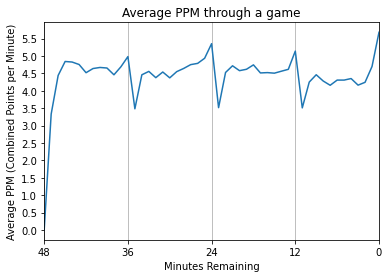

In [656]:
fig = plt.figure()
ax = plt.axes()

ax.plot(ppms_avg["average"])
ax.invert_xaxis()
plt.xlim(48, 0)
plt.xticks(np.arange(48, -1, step=-12))
plt.yticks(np.arange(0, 6, step=0.5))
plt.grid(axis='x')
plt.title('Average PPM through a game')
plt.xlabel('Minutes Remaining')
plt.ylabel('Average PPM (Combined Points per Minute)')
plt.show()

### We can see that there is indeed a drop in the combined point production during the first minute of each quarter, however it bounces back fairly quickly.
#### This could be attributed to teams taking longer possessions in the first minutes of each quarter and getting back to rhythm slowly
### Another interesting fact that can be deducted from this graph is that during the very end of each quarter the combined point production skyrockets.
#### A possible explanation would be the fact that teams try to take advantage of "2-for-1" opportunities during the last minute of the quarter

## Now we'd like to check is whether the point production during the first 2 minutes of a quarter is different from the rest of the quarter

In [657]:
# We create 2 new dataframes containing data for the first 2 minutes and the last 10
first2=data[data["minutes"]>=10]
last10=data[data["minutes"]<10]

In [658]:
first2.head(50)

,actionNumber,clock,timeActual,period,periodType,actionType,subType,qualifiers,personId,x,...,turnoverTotal,stealPlayerName,stealPersonId,blockPlayerName,blockPersonId,gameid,value,minutes,total_score,minutes_remaining
0,2,PT12M00.00S,2022-01-30T18:11:20.4Z,1,REGULAR,period,start,[],0,NaN,...,NaN,NaN,NaN,NaN,NaN,22100751,NaN,12,0,48
1,4,PT11M56.00S,2022-01-30T18:11:24.0Z,1,REGULAR,jumpball,recovered,[],203076,NaN,...,NaN,NaN,NaN,NaN,NaN,22100751,NaN,11,0,47
2,7,PT11M35.00S,2022-01-30T18:11:43.8Z,1,REGULAR,2pt,Jump Shot,['pointsinthepaint'],203076,17.033509,...,NaN,NaN,NaN,NaN,NaN,22100751,NaN,11,0,47
3,8,PT11M32.00S,2022-01-30T18:11:46.8Z,1,REGULAR,rebound,defensive,[],203991,NaN,...,NaN,NaN,NaN,NaN,NaN,22100751,NaN,11,0,47
4,9,PT11M17.00S,2022-01-30T18:12:02.1Z,1,REGULAR,2pt,Layup,['pointsinthepaint'],1628381,93.117608,...,NaN,NaN,NaN,NaN,NaN,22100751,NaN,11,2,47
5,11,PT11M05.00S,2022-01-30T18:12:15.5Z,1,REGULAR,foul,personal,['2freethrow'],1628381,NaN,...,NaN,NaN,NaN,NaN,NaN,22100751,NaN,11,2,47
6,13,PT11M05.00S,2022-01-30T18:12:45.2Z,1,REGULAR,freethrow,1 of 2,[],201566,NaN,...,NaN,NaN,NaN,NaN,NaN,22100751,NaN,11,3,47
7,14,PT11M05.00S,2022-01-30T18:12:45.2Z,1,REGULAR,freethrow,2 of 2,[],201566,NaN,...,NaN,NaN,NaN,NaN,NaN,22100751,NaN,11,3,47
8,15,PT11M04.00S,2022-01-30T18:12:46.2Z,1,REGULAR,rebound,defensive,['team'],0,NaN,...,NaN,NaN,NaN,NaN,NaN,22100751,NaN,11,3,47
9,16,PT11M04.00S,2022-01-30T18:13:09.1Z,1,REGULAR,stoppage,out-of-bounds,[],0,NaN,...,NaN,NaN,NaN,NaN,NaN,22100751,NaN,11,3,47


In [659]:
# We are interested in the final rows of each quarter so we can see the box score 
first2["last_line"]=0

C:\Users\marli\AppData\Local\Temp/ipykernel_13024/2539590158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first2["last_line"]=0


In [660]:
for i in range(len(first2.index)-1):
    if abs(first2.iloc[i+1,3]-first2.iloc[i,3])>=1:
        first2.iloc[i,len(first2.columns)-1]=1
first2.loc[first2.index[-1],"last_line"]=1

C:\Users\marli\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [661]:
first2=first2[first2["last_line"]==1]

In [662]:
last10["last_line"]=0

for i in range(len(last10.index)-1):
    if last10.iloc[i,5]=="period" and last10.iloc[i,6]=="end":
        last10.iloc[i,len(last10.columns)-1]=1

C:\Users\marli\AppData\Local\Temp/ipykernel_13024/2671760714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last10["last_line"]=0


In [663]:
last10=last10[last10["last_line"]==1]

In [664]:
# We need to calculate the score for each individual quarter
first2["total_score"]=first2["scoreHome"]+first2["scoreAway"]

last10["total_score"]=last10["scoreHome"]+last10["scoreAway"]

In [725]:
# We merge the 2 datasets
data2=first2.append(last10)

In [726]:
data2.sort_index(inplace=True)

In [727]:
data2.head(50)

,actionNumber,clock,timeActual,period,periodType,actionType,subType,qualifiers,personId,x,...,blockPlayerName,blockPersonId,gameid,value,minutes,total_score,minutes_remaining,last_line,point_score,ppm
20,29,PT10M08.00S,2022-01-30T18:14:24.2Z,1,REGULAR,2pt,DUNK,"['pointsinthepaint', '2ndchance']",203991,93.249014,...,NaN,NaN,22100751,NaN,10,8,46,1,8.0,4.0
126,165,PT00M00.00S,2022-01-30T18:36:10.1Z,1,REGULAR,period,end,[],0,NaN,...,NaN,NaN,22100751,NaN,0,67,36,1,59.0,5.9
137,179,PT10M08.00S,2022-01-30T18:40:44.1Z,2,REGULAR,3pt,Jump Shot,[],203992,67.362024,...,NaN,NaN,22100751,NaN,10,78,34,1,11.0,5.5
263,331,PT00M00.00S,2022-01-30T19:07:49.4Z,2,REGULAR,period,end,[],0,NaN,...,NaN,NaN,22100751,NaN,0,133,24,1,55.0,5.5
281,353,PT10M06.00S,2022-01-30T19:25:09.1Z,3,REGULAR,2pt,DUNK,"['pointsinthepaint', 'fastbreak']",203991,5.732589,...,NaN,NaN,22100751,NaN,10,145,22,1,12.0,6.0
418,522,PT00M00.00S,2022-01-30T19:53:06.9Z,3,REGULAR,period,end,[],0,NaN,...,NaN,NaN,22100751,NaN,0,192,12,1,47.0,4.7
434,543,PT10M01.00S,2022-01-30T19:57:47.2Z,4,REGULAR,rebound,defensive,[],201568,NaN,...,NaN,NaN,22100751,NaN,10,199,10,1,7.0,3.5
541,667,PT00M00.00S,2022-01-30T20:23:51.2Z,4,REGULAR,period,end,[],0,NaN,...,NaN,NaN,22100751,NaN,0,250,0,1,51.0,5.1
559,22,PT10M10.00S,2022-01-30T18:12:39.1Z,1,REGULAR,rebound,defensive,[],1628970,NaN,...,NaN,NaN,22100752,NaN,10,2,46,1,2.0,1.0
681,172,PT00M00.00S,2022-01-30T18:37:10.1Z,1,REGULAR,period,end,[],0,NaN,...,NaN,NaN,22100752,NaN,0,49,36,1,47.0,4.7


In [724]:
# We have to calculate the total points scored in each period of time, for that we create a new column name point_score
# We calculate the difference between each period
data2["point_score"]=data2["total_score"].diff()

# Some negative values are created when we calculate differences between 2 different games, we replace them with the total_score
for i in data2.index:
    if data2.loc[i,"point_score"]<0:
        data2.loc[i,"point_score"]=data2.loc[i,"total_score"]
        
# The difference for the first value is N/A and we replace it with the total_score
data2.loc[data2.index[0],"point_score"]=data2.loc[data2.index[0],"total_score"]

In [669]:
# We separate the 2 dataframes once again
first2=data2[data2["minutes"]>=10]
last10=data2[data2["minutes"]<10]

### In order to test our hypothesis, we create the metric of total points scored per minute (ppm)

In [670]:
# ppm for the first 2 minutes of a quarter is divided by 2
first2["ppm"]=first2["point_score"]/2
# ppm for the last 10 minutes of a quarter is divided by 10
last10["ppm"]=last10["point_score"]/10

C:\Users\marli\AppData\Local\Temp/ipykernel_13024/3780396244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first2["ppm"]=first2["point_score"]/2
C:\Users\marli\AppData\Local\Temp/ipykernel_13024/3780396244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last10["ppm"]=last10["point_score"]/10


<AxesSubplot:ylabel='Frequency'>

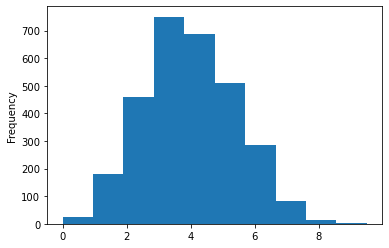

In [671]:
# Histograms of the metrics for both time periods
first2["ppm"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

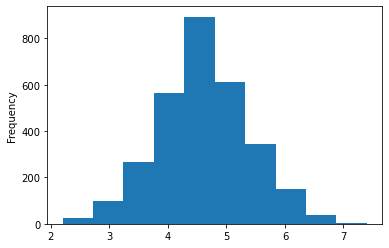

In [672]:
last10["ppm"].plot(kind="hist")

In [673]:
from scipy.stats import ttest_ind

#### We are going to perform a hypothesis test to compare whether the means of the two time periods are significantly different
#### Ho: μ1=μ2, There is not a significant difference
#### H1: μ1<>μ2, There is a significant difference

In [674]:
# Hypothesis testing
first2_mean = first2["ppm"].mean()
last10_mean = last10["ppm"].mean()
print("First 2 minutes of a quarter mean value:",first2_mean)
print("Last 10 minutes of a quarter mean value:",last10_mean)
first2_std = first2["ppm"].std()
last10_std = last10["ppm"].std()
print("First 2 minutes of a quarter std value:",first2_std)
print("Last 10 minutes of a quarter std value:",last10_std)
ttest,pval = ttest_ind(first2["ppm"],last10["ppm"])
print("p-value",pval)
if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

First 2 minutes of a quarter mean value: 3.939
Last 10 minutes of a quarter mean value: 4.624366666666665
First 2 minutes of a quarter std value: 1.532991309211527
Last 10 minutes of a quarter std value: 0.7901335557365314
p-value 3.647500905905782e-101
we reject null hypothesis


### After performing the t-test we reject the null hypothesis at the 5% significance level and we conclude that there is a difference between the offensive performance during the first 2 minutes of each quarter.

### But why does this happen? Is it affected by the pace of the game? Let's check the possessions per minute

In [675]:
data_poss=data

In [676]:
data_poss["poss_cum"]=0

In [677]:
# For each row we create a column with the cummulative possessions up to that point
for i in range(len(data_poss)-1):
    if data_poss.iloc[i+1,11]==0:
        data_poss.iloc[i+1,len(data_poss.columns)-1]=0
    elif data_poss.iloc[i+1,11]-data_poss.iloc[i,11]!=0:
        data_poss.iloc[i+1,len(data_poss.columns)-1]=data_poss.iloc[i,len(data_poss.columns)-1]+1
    else:
        data_poss.iloc[i+1,len(data_poss.columns)-1]=data_poss.iloc[i,len(data_poss.columns)-1]
        

In [678]:
for i in range(len(data_poss)):
    if data_poss.iloc[i,5]=="game" and data_poss.iloc[i,6]=="end":
        data_poss.iloc[i,len(data_poss.columns)-1]=data_poss.iloc[i-1,len(data_poss.columns)-1]

In [679]:
# Games 22100730, 22100346, 22100607, 22100086, 22100219, 22100494 and 22100402 had some irregularities on their data so we have to delete them from our database
data_poss.drop(data_poss[data_poss["gameid"]==22100730].index,inplace=True)
data_poss.drop(data_poss[data_poss["gameid"]==22100346].index,inplace=True)
data_poss.drop(data_poss[data_poss["gameid"]==22100607].index,inplace=True)
data_poss.drop(data_poss[data_poss["gameid"]==22100086].index,inplace=True)
data_poss.drop(data_poss[data_poss["gameid"]==22100219].index,inplace=True)
data_poss.drop(data_poss[data_poss["gameid"]==22100494].index,inplace=True)
data_poss.drop(data_poss[data_poss["gameid"]==22100402].index,inplace=True)

In [694]:
# We create a dataframe with the possesions per minute
poss_pms=pd.DataFrame(index=data["gameid"].unique(),columns=data["minutes_remaining"].unique())

for i in data["gameid"].unique():
    for j in data_poss["minutes_remaining"].unique():
        poss_pms.loc[i,j]=data_poss[(data_poss["gameid"]==i) & (data_poss["minutes_remaining"]==j)].iloc[len(data_poss[(data_poss["gameid"]==i) & (data_poss["minutes_remaining"]==j)])-1,-1]

In [695]:
for i in range(len(poss_pms.columns)-1):
    poss_pms[i]=poss_pms[i]-poss_pms[i+1]

In [696]:
# We calculate the average for each minute
poss_pms_avg=pd.DataFrame(index=poss_pms.columns)
poss_pms_avg["average"]=0
for i in poss_pms.columns:
    poss_pms_avg.loc[i,"average"]=poss_pms[i].mean()
    
poss_pms_avg.sort_index(inplace=True)

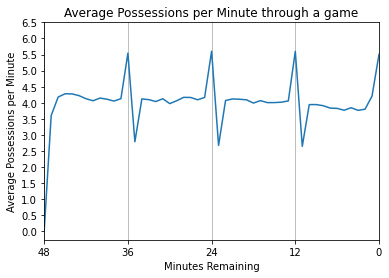

In [703]:
fig = plt.figure()
ax = plt.axes()

ax.plot(poss_pms_avg["average"])
ax.invert_xaxis()
plt.xlim(48, 0)
plt.xticks(np.arange(48, -1, step=-12))
plt.yticks(np.arange(0, 7, step=0.5))
plt.grid(axis='x')
plt.title('Average Possessions per Minute through a game')
plt.xlabel('Minutes Remaining')
plt.ylabel('Average Possessions per Minute')
plt.show()

### After plotting the possessions per minute we observe a similar behaviour as the points per minute, spiking at the end of each quarter and very low at the start of them

### Let's check what happens with the average points per possession per minute

In [698]:
points_per_poss_per_minute=ppms/poss_pms

In [699]:
points_per_poss_per_minute=points_per_poss_per_minute.fillna(0)
points_per_poss_per_minute = points_per_poss_per_minute.replace([np.inf],0)

In [700]:
# We calculate the average for each minute
points_per_poss_per_minute_avg=pd.DataFrame(index=poss_pms.columns)
points_per_poss_per_minute_avg["average"]=0
for i in points_per_poss_per_minute.columns:
    points_per_poss_per_minute_avg.loc[i,"average"]=points_per_poss_per_minute[i].mean()
    
points_per_poss_per_minute_avg.sort_index(inplace=True)

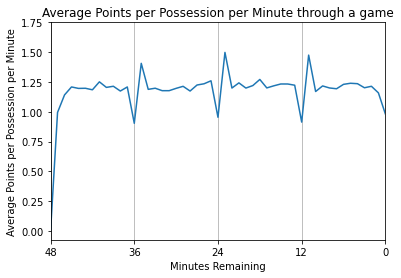

In [702]:
fig = plt.figure()
ax = plt.axes()

ax.plot(points_per_poss_per_minute_avg["average"])
ax.invert_xaxis()
plt.xlim(48, 0)
plt.xticks(np.arange(48, -1, step=-12))
plt.yticks(np.arange(0, 2, step=0.25))
plt.grid(axis='x')
plt.title('Average Points per Possession per Minute through a game')
plt.xlabel('Minutes Remaining')
plt.ylabel('Average Points per Possession per Minute')
plt.show()

### Here we get the opposite results. Teams seem more efficient at the start of each quarter and less efficient at the end of it as they probably hurry to get up a low percentage shot at the last seconds of the quarter

### Now, let's examine whether the offensive production (as measured by points per minute) in the first 2 minutes changes between the two halves of the game.
#### We want to check if there is a difference between ppm in the first 2 minutes of the first half quarters (Q1 & Q2) and the first 2 minutes of the second half quarters (Q3 & Q4)

#### Ho: μ1=μ2, There is not a significant difference
#### H1: μ1<>μ2, There is a significant difference

In [704]:
first2_1h=first2[first2["period"]<=2]
first2_2h=first2[first2["period"]>=3]

In [705]:
# Hypothesis testing
first2_1h_mean = first2_1h["ppm"].mean()
first2_2h_mean = first2_2h["ppm"].mean()
print("First 2 minutes of the first half quarters mean value:",first2_1h_mean)
print("First 2 minutes of the second half quarters mean value:",first2_2h_mean)
first2_1h_std = first2_1h["ppm"].std()
first2_2h_std = first2_2h["ppm"].std()
print("First 2 minutes of the first half quarters std value:",first2_std)
print("First 2 minutes of the second half quarters std value:",last10_std)
ttest,pval = ttest_ind(first2_1h["ppm"],first2_2h["ppm"])
print("p-value",pval)
if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

First 2 minutes of the first half quarters mean value: 3.9263333333333335
First 2 minutes of the second half quarters mean value: 3.9516666666666667
First 2 minutes of the first half quarters std value: 1.532991309211527
First 2 minutes of the second half quarters std value: 0.7901335557365314
p-value 0.6509362303181166
we accept null hypothesis


### Although there is a difference in the standard deviation between the ppm scored in the first 2 minutes of the first 2 quarters and the ppm scored in the first 2 minutes of the last 2 quarters, the mean is quite similar and according to the t-test we can't reject the null hypothesis

## What about the point production between the two halves? Which half produces more points and is their difference significant?

In [730]:
# From the data2 dataframe we only keep the rows we want
data2=data2[((data2["minutes"]==0) & (data2["period"]==2)) | ((data2["minutes"]==0) & (data2["period"]==4))]

In [731]:
# We have to calculate the total points scored in each half
# We calculate the difference between each period
data2["point_score"]=data2["total_score"].diff()

# Some negative values are created when we calculate differences between 2 different games, we replace them with the total_score
for i in data2.index:
    if data2.loc[i,"point_score"]<0:
        data2.loc[i,"point_score"]=data2.loc[i,"total_score"]
        
# The difference for the first value is N/A and we replace it with the total_score
data2.loc[data2.index[0],"point_score"]=data2.loc[data2.index[0],"total_score"]

C:\Users\marli\AppData\Local\Temp/ipykernel_13024/409628055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["point_score"]=data2["total_score"].diff()
C:\Users\marli\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [732]:
# We split the dataset again
first_half=data2[data2["period"]==2]
second_half=data2[data2["period"]==4]

<AxesSubplot:ylabel='Frequency'>

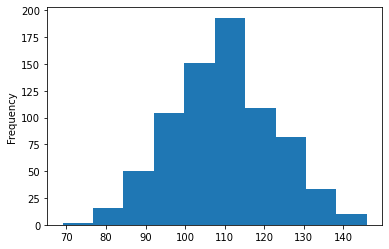

In [733]:
# Histograms for both halves
first_half["point_score"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

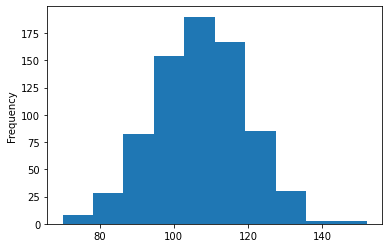

In [734]:
second_half["point_score"].plot(kind="hist")

In [735]:
first_half_mean = first_half["point_score"].mean()
second_half_mean = second_half["point_score"].mean()
print("Mean points scored in the first half:",first_half_mean)
print("Mean points scored in the second half:",second_half_mean)

Mean points scored in the first half: 109.55733333333333
Mean points scored in the second half: 106.92933333333333


### On average this season, teams have performed better offensively in the first half.

### And now for the test
#### Ho: μ1=μ2, There is not a significant difference
#### H1: μ1<>μ2, There is a significant difference

In [736]:
# Hypothesis testing
first_half_std = first_half["point_score"].std()
second_half_std = second_half["point_score"].std()
print("Standard deviation for points scored in the first half:",first_half_std)
print("Standard deviation for points scored in the second half:",second_half_std)
ttest,pval = ttest_ind(first_half["point_score"],second_half["point_score"])
print("p-value",pval)
if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

Standard deviation for points scored in the first half: 12.99527667436699
Standard deviation for points scored in the second half: 12.519211120713749
p-value 6.970259668915989e-05
we reject null hypothesis


### So after performing the t-test we reject the null hypothesis at the 5% significance level and we conclude that there is a difference between the offensive performance between the 2 halves

#### This could be attributed to factors such as:
- the defense being more sluggish in the first half
- strategic changes and changes in the defensive scheme as the game progresses
- higher sense of urgency at the last moments of the game might lead to tighter defense, especially when the score is closer
- lower pace in the second half, which we will examine next

### Let's examine the pace of the game

In [737]:
data_poss_h1=data_poss[(data_poss["period"]==1) | (data_poss["period"]==2)]
data_poss_h2=data_poss[(data_poss["period"]==3) | (data_poss["period"]==4)]

In [738]:
# We create 2 new dataframes that contain the number of possessions for each gameid, one for each half
poss_h1=pd.DataFrame(data_poss_h1.groupby("gameid")["poss_cum"].max())
poss_h2=pd.DataFrame(data_poss_h2.groupby("gameid")["poss_cum"].max())
poss_h2["min"]=pd.DataFrame(data_poss_h2.groupby("gameid")["poss_cum"].min())

In [739]:
poss_h2["poss_cum"]=poss_h2["poss_cum"]-poss_h2["min"]+1
poss_h2.drop(columns="min",inplace=True)

In [740]:
# We can use the dataframes created above as a proxy for the pace of a half.
# The more possessions, the higher the pace

first_half_poss_mean = poss_h1["poss_cum"].mean()
second_half_poss_mean = poss_h2["poss_cum"].mean()
print("Mean possessions in the first half:",first_half_poss_mean)
print("Mean possessions in the second half:",second_half_poss_mean)

Mean possessions in the first half: 99.63257065948856
Mean possessions in the second half: 97.27725437415882


### On average, the first half of a games has more possessions than the second one and thus a faster pace
#### We can also check the hypothesis
#### Ho: μ1=μ2, There is not a significant difference
#### H1: μ1<>μ2, There is a significant difference

In [741]:
# Hypothesis testing
first_half_poss_std = poss_h1["poss_cum"].std()
second_half_poss_std = poss_h2["poss_cum"].std()
print("Standard deviation for posessions in the first half:",first_half_poss_std)
print("Standard deviation for posessions in the second half:",second_half_poss_std)
ttest,pval = ttest_ind(poss_h1["poss_cum"],poss_h2["poss_cum"])
print("p-value",pval)
if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

Standard deviation for posessions in the first half: 5.2568389277382055
Standard deviation for posessions in the second half: 5.6892679976384635
p-value 2.5427765045058275e-16
we reject null hypothesis


### So after performing the t-test we reject the null hypothesis at the 5% significance level and we conclude that there is a difference between the number of possessions between the 2 halves
#### This means that slower pace could be a potential reason for less offensive productivity in the second half

## A fair question that can be raised here is whether this "2-minute slump" affects the outcome of the game and how different would the team standings be if all teams didn't have this slump

In [742]:
# First we load some game data
games_dupl=pd.read_csv('Games_data_21-22.csv')
games=pd.read_csv('Games_data_21-22.csv')

In [743]:
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22021,1610612747,LAL,Los Angeles Lakers,22100751,2022-01-30,LAL @ ATL,L,240,121,...,0.522,6,32,38,29,5,2,12,24,-8.0
1,22021,1610612737,ATL,Atlanta Hawks,22100751,2022-01-30,ATL vs. LAL,W,240,129,...,0.656,8,37,45,31,7,0,12,21,8.0
2,22021,1610612746,LAC,LA Clippers,22100752,2022-01-30,LAC @ CHA,W,239,115,...,0.842,6,52,58,23,5,6,15,23,25.0
3,22021,1610612766,CHA,Charlotte Hornets,22100752,2022-01-30,CHA vs. LAC,L,239,90,...,0.667,13,33,46,24,6,2,8,15,-25.0
4,22021,1610612741,CHI,Chicago Bulls,22100753,2022-01-30,CHI vs. POR,W,241,130,...,0.944,8,36,44,36,10,3,7,16,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,22021,1610612741,CHI,Chicago Bulls,22100004,2021-10-20,CHI @ DET,W,239,94,...,0.867,9,39,48,18,8,5,17,19,6.0
1496,22021,1610612744,GSW,Golden State Warriors,22100002,2021-10-19,GSW @ LAL,W,240,121,...,0.833,9,41,50,30,9,2,17,18,7.0
1497,22021,1610612747,LAL,Los Angeles Lakers,22100002,2021-10-19,LAL vs. GSW,L,241,114,...,0.474,5,40,45,21,7,4,17,25,-7.0
1498,22021,1610612749,MIL,Milwaukee Bucks,22100001,2021-10-19,MIL vs. BKN,W,239,127,...,0.778,13,41,54,25,8,9,7,19,23.0


In [744]:
# Removing duplicates
games=games[games["MATCHUP"].str.contains("vs")]

In [745]:
games["home_team"]=games['MATCHUP'].str.split(" vs. ").str[0]
games["away_team"]=games['MATCHUP'].str.split(" vs. ").str[1]

C:\Users\marli\AppData\Local\Temp/ipykernel_13024/2994950845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["home_team"]=games['MATCHUP'].str.split(" vs. ").str[0]
C:\Users\marli\AppData\Local\Temp/ipykernel_13024/2994950845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["away_team"]=games['MATCHUP'].str.split(" vs. ").str[1]


In [746]:
games_short=games[["GAME_ID","home_team","away_team"]]
games_short.rename(columns={'GAME_ID': 'gameid'}, inplace=True)

C:\Users\marli\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [747]:
# Joining the two tables
data=data.merge(games_short, how="left", on="gameid")

In [748]:
data

,actionNumber,clock,timeActual,period,periodType,actionType,subType,qualifiers,personId,x,...,blockPlayerName,blockPersonId,gameid,value,minutes,total_score,minutes_remaining,poss_cum,home_team,away_team
0,2,PT12M00.00S,2022-01-30T18:11:20.4Z,1,REGULAR,period,start,[],0,NaN,...,NaN,NaN,22100751,NaN,12,0,48,0,ATL,LAL
1,4,PT11M56.00S,2022-01-30T18:11:24.0Z,1,REGULAR,jumpball,recovered,[],203076,NaN,...,NaN,NaN,22100751,NaN,11,0,47,1,ATL,LAL
2,7,PT11M35.00S,2022-01-30T18:11:43.8Z,1,REGULAR,2pt,Jump Shot,['pointsinthepaint'],203076,17.033509,...,NaN,NaN,22100751,NaN,11,0,47,1,ATL,LAL
3,8,PT11M32.00S,2022-01-30T18:11:46.8Z,1,REGULAR,rebound,defensive,[],203991,NaN,...,NaN,NaN,22100751,NaN,11,0,47,2,ATL,LAL
4,9,PT11M17.00S,2022-01-30T18:12:02.1Z,1,REGULAR,2pt,Layup,['pointsinthepaint'],1628381,93.117608,...,NaN,NaN,22100751,NaN,11,2,47,2,ATL,LAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417407,689,PT00M11.30S,2021-10-20T01:56:43.5Z,4,REGULAR,turnover,shot clock,['team'],0,NaN,...,NaN,NaN,22100001,NaN,0,231,0,203,MIL,BKN
417408,690,PT00M00.00S,2021-10-20T01:57:01.1Z,4,REGULAR,3pt,Jump Shot,['fromturnover'],201949,34.379106,...,NaN,NaN,22100001,NaN,0,231,0,204,MIL,BKN
417409,691,PT00M00.00S,2021-10-20T01:57:03.6Z,4,REGULAR,rebound,offensive,['team'],0,NaN,...,NaN,NaN,22100001,NaN,0,231,0,204,MIL,BKN
417410,692,PT00M00.00S,2021-10-20T01:57:11.1Z,4,REGULAR,period,end,[],0,NaN,...,NaN,NaN,22100001,NaN,0,231,0,204,MIL,BKN


In [749]:
# We create a dataframe to store the points per minute for each minute for each team
team_ppms=pd.DataFrame(0,index=data["home_team"].unique(),columns=data["minutes_remaining"].unique())

In [750]:
# We obtain the cumulative points per minute for each team for all games played thus far
for i in data["gameid"].unique():
    for j in data["minutes_remaining"].unique():
        for k in data["home_team"].unique():
            if data[(data["gameid"]==i) & (data["minutes_remaining"]==j)].iloc[len(data[(data["gameid"]==i) & (data["minutes_remaining"]==j)])-1,-2]==k:
                team_ppms.loc[k ,j]+=data[(data["gameid"]==i) & (data["minutes_remaining"]==j)].iloc[len(data[(data["gameid"]==i) & (data["minutes_remaining"]==j)])-1,12]
            if data[(data["gameid"]==i) & (data["minutes_remaining"]==j)].iloc[len(data[(data["gameid"]==i) & (data["minutes_remaining"]==j)])-1,-1]==k:
                team_ppms.loc[k,j]+=data[(data["gameid"]==i) & (data["minutes_remaining"]==j)].iloc[len(data[(data["gameid"]==i) & (data["minutes_remaining"]==j)])-1,13]

In [751]:
# To obtain the individual ones per minute
for i in range(len(ppms.columns)-1):
    team_ppms[i]=team_ppms[i]-team_ppms[i+1]

In [752]:
team_ppms

,48,47,46,45,44,43,42,41,40,39,...,9,8,7,6,5,4,3,2,1,0
ATL,0,91,120,119,105,127,114,104,91,139,...,112,92,102,111,102,118,94,91,108,148
CHA,0,82,111,116,112,129,111,146,102,142,...,118,126,128,106,125,101,106,122,126,131
CHI,0,68,131,91,114,115,126,100,118,97,...,125,129,110,125,104,114,101,111,115,131
DET,0,64,114,92,126,94,86,104,103,108,...,106,103,99,110,109,102,95,125,104,131
MIL,0,84,118,126,125,132,126,140,107,113,...,102,129,107,106,79,104,102,112,129,147
ORL,0,85,94,130,110,109,101,109,101,98,...,107,111,116,105,126,95,117,113,124,183
PHX,0,106,129,132,118,114,114,125,93,112,...,95,114,123,104,113,108,119,98,142,146
MIN,0,87,146,135,107,131,111,105,141,114,...,125,108,93,103,116,95,108,85,107,133
NOP,0,76,101,126,113,118,96,81,114,107,...,106,100,108,100,120,108,110,115,125,172
DAL,0,81,110,134,130,120,107,101,107,119,...,112,106,91,116,107,105,109,93,105,120


In [753]:
# We now have to calculate the averages per team per game
# Counting the games played until now
games_played=pd.DataFrame(0,index=data["home_team"].unique(),columns=["total"])

for i in data["gameid"].unique():
    for j in games_played.index:
        if games[games["GAME_ID"]==i].iloc[0,-2]==j:
            games_played.loc[j,"total"]+=1
        if games[games["GAME_ID"]==i].iloc[0,-1]==j:
            games_played.loc[j,"total"]+=1

In [754]:
# Dividing to get the average
team_ppms_avg=team_ppms
for i in games_played.index:
    team_ppms_avg.loc[i]=team_ppms.loc[i]/games_played.loc[i,"total"]

In [755]:
# Now that we have the averages, we have to calculate average ppm in the first 2 minutes vs the last 10 minutes of a quarter
# We first split the dataset
first2_team_ppm=team_ppms_avg[[47,46,35,34,23,22,11,10]]
last10_team_ppm=team_ppms_avg.drop(columns=[48,47,46,35,34,23,22,11,10])

In [756]:
# Getting the averages for each team
first2_team_ppm_avg=pd.DataFrame(index=first2_team_ppm.index,columns=["average"])
last10_team_ppm_avg=pd.DataFrame(index=first2_team_ppm.index,columns=["average"])
for i in first2_team_ppm.index:
    first2_team_ppm_avg.loc[i,"average"]=first2_team_ppm.loc[i].mean()
    last10_team_ppm_avg.loc[i,"average"]=last10_team_ppm.loc[i].mean()

In [757]:
# Calculating the difference between the averages
diff=pd.concat([first2_team_ppm_avg["average"],last10_team_ppm_avg["average"]], axis=1, keys=["first2","last10"])
diff["diff"]=diff["last10"]-diff["first2"]

In [762]:
diff.sort_values("diff").head(3)

,first2,last10,diff
PHX,2.239796,2.368878,0.129082
BOS,2.068627,2.236275,0.167647
NYK,2.0075,2.1835,0.176


In [764]:
diff.sort_values("diff").tail(3)

,first2,last10,diff
SAC,1.867647,2.344118,0.476471
MIA,1.86,2.34,0.48
OKC,1.679348,2.182609,0.503261


In [759]:
diff.to_csv("diff.csv")

|Team|First 2 Minutes ppm|Last 10 Minutes ppm|Difference|
|----|-------------------|-------------------|----------|
|PHX| 2.24 | 2.37| 0.13|
|BOS| 2.07| 2.24| 0.17|
|NYK| 2.01| 2.18| 0.18|
|...| ...|...|...|
|SAC| 1.87| 2.34| 0.48|
|MIA| 1.86| 2.34| 0.48|
|OKC| 1.68| 2.18| 0.50|

### We can see that the most "stable" team so far this year has been the Phoenix Suns. On the other hand, the OKC Thunder have the largest difference in terms of average ppm between the first 2 minutes of a quarter and the last 10

In [765]:
# Let's try to predict how many more points a team would score if they produced the same average points per minute
# in their first 2 minutes of each quarter as the rest of the quarter
# In order to calculate this, we must multiply the difference by 8 (2 minutes * 4 quarters)

In [766]:
diff["real"]=diff["diff"]*8
diff["real"]=diff["real"].apply(lambda x: round(x))

In [767]:
# Creating a Dataframe with the results of each game
results=pd.DataFrame(index=data["gameid"].unique(),columns=["home_team","home_score","away_team","away_score"])

In [768]:
for i in results.index:
    if "vs." in games_dupl[games_dupl["GAME_ID"]==i].iloc[0,6]:
        results.loc[i,"home_team"]=games_dupl[games_dupl["GAME_ID"]==i].iloc[0,2]
        results.loc[i,"home_score"]=games_dupl[games_dupl["GAME_ID"]==i].iloc[0,9]
        results.loc[i,"away_team"]=games_dupl[games_dupl["GAME_ID"]==i].iloc[1,2]
        results.loc[i,"away_score"]=games_dupl[games_dupl["GAME_ID"]==i].iloc[1,9]
    else:
        results.loc[i,"home_team"]=games_dupl[games_dupl["GAME_ID"]==i].iloc[1,2]
        results.loc[i,"home_score"]=games_dupl[games_dupl["GAME_ID"]==i].iloc[1,9]
        results.loc[i,"away_team"]=games_dupl[games_dupl["GAME_ID"]==i].iloc[0,2]
        results.loc[i,"away_score"]=games_dupl[games_dupl["GAME_ID"]==i].iloc[0,9]

In [769]:
results["Winner"]=0
results["Loser"]=0

In [770]:
results.loc[results['home_score']-results['away_score'] > 0, 'Winner'] = results['home_team']
results.loc[results['home_score']-results['away_score'] > 0, 'Loser'] = results['away_team']
results.loc[results['home_score']-results['away_score'] < 0, 'Winner'] = results['away_team']
results.loc[results['home_score']-results['away_score'] < 0, 'Loser'] = results['home_team']

In [771]:
results

,home_team,home_score,away_team,away_score,Winner,Loser
22100751,ATL,129,LAL,121,ATL,LAL
22100752,CHA,90,LAC,115,LAC,CHA
22100753,CHI,130,POR,116,CHI,POR
22100754,DET,115,CLE,105,DET,CLE
22100756,MIL,100,DEN,136,DEN,MIL
...,...,...,...,...,...,...
22100009,NOP,97,PHI,117,PHI,NOP
22100006,TOR,83,WAS,98,WAS,TOR
22100004,DET,88,CHI,94,CHI,DET
22100002,LAL,114,GSW,121,GSW,LAL


In [772]:
# We want to add the difference we created above
results["new_home_score"]=0
results["new_away_score"]=0

for i in results.index:
    for j in diff.index:
        if results.loc[i,"home_team"]==j:
            results.loc[i,"new_home_score"]=results.loc[i,"home_score"]+diff.loc[j,"real"]
        if results.loc[i,"away_team"]==j:
            results.loc[i,"new_away_score"]=results.loc[i,"away_score"]+diff.loc[j,"real"]

In [773]:
# Calculate the new winners and losers
results["new_Winner"]=0
results["new_Loser"]=0

results.loc[results['new_home_score']-results['new_away_score'] > 0, 'new_Winner'] = results['home_team']
results.loc[results['new_home_score']-results['new_away_score'] > 0, 'new_Loser'] = results['away_team']
results.loc[results['new_home_score']-results['new_away_score'] < 0, 'new_Winner'] = results['away_team']
results.loc[results['new_home_score']-results['new_away_score'] < 0, 'new_Loser'] = results['home_team']

# By adding the new values there are some ties that might occur and we need to take care of them
results["tie_home"]=0
results["tie_away"]=0
results.loc[results['new_home_score']-results['new_away_score'] == 0, 'tie_home'] = results['home_team']
results.loc[results['new_home_score']-results['new_away_score'] == 0, 'tie_away'] = results['away_team']

In [774]:
# We create a new dataframe with the records
records=pd.DataFrame(0,index=diff.index,columns=["Wins","Losses","New Wins","New Losses","Tie_home","Tie_away"])

In [775]:
records["Wins"]=results.groupby("Winner")["Winner"].count()
records["Losses"]=results.groupby("Loser")["Loser"].count()
records["New Wins"]=results.groupby("new_Winner")["new_Winner"].count()
records["New Losses"]=results.groupby("new_Loser")["new_Loser"].count()
records["Tie_home"]=results.groupby("tie_home")["tie_home"].count()
records["Tie_away"]=results.groupby("tie_away")["tie_away"].count()

In [776]:
records=records.fillna(0)
records["total_ties"]=records["Tie_home"]+records["Tie_away"]
records.drop(columns=["Tie_home","Tie_away"],inplace=True)

In [777]:
# Calculating win percentages
records["win_percentage"]=records["Wins"]/(records["Wins"]+records["Losses"])
records["new_win_percentage"]=records["New Wins"]/(records["New Wins"]+records["New Losses"])

In [778]:
records

,Wins,Losses,New Wins,New Losses,total_ties,win_percentage,new_win_percentage
ATL,24,25,23,25,1.0,0.489796,0.479167
CHA,27,23,25,23,2.0,0.540000,0.520833
CHI,30,18,28,17,3.0,0.625000,0.622222
DET,12,37,12,37,0.0,0.244898,0.244898
MIL,30,20,30,20,0.0,0.600000,0.600000
ORL,11,40,11,40,0.0,0.215686,0.215686
PHX,40,9,40,9,0.0,0.816327,0.816327
MIN,24,25,24,25,0.0,0.489796,0.489796
NOP,18,31,18,31,0.0,0.367347,0.367347
DAL,29,22,29,22,0.0,0.568627,0.568627


In [779]:
conf=pd.read_csv("Conferences.csv",index_col=0)

In [780]:
records=records.join(conf)

In [781]:
standings_east=records[records["Conf"]=='E']
standings_west=records[records["Conf"]=='W']

In [782]:
standings_east.sort_values("win_percentage",ascending=False)

,Wins,Losses,New Wins,New Losses,total_ties,win_percentage,new_win_percentage,Conf
MIA,32,18,32,17,1.0,0.640000,0.653061,E
CHI,30,18,28,17,3.0,0.625000,0.622222,E
PHI,30,19,31,17,1.0,0.612245,0.645833,E
MIL,30,20,30,20,0.0,0.600000,0.600000,E
CLE,29,20,28,20,1.0,0.591837,0.583333,E
BKN,29,20,29,20,0.0,0.591837,0.591837,E
CHA,27,23,25,23,2.0,0.540000,0.520833,E
TOR,24,22,24,22,0.0,0.521739,0.521739,E
BOS,26,25,24,26,1.0,0.509804,0.480000,E
ATL,24,25,23,25,1.0,0.489796,0.479167,E


In [787]:
standings_east.sort_values("new_win_percentage",ascending=False).to_csv("East Standings.csv")

In [784]:
standings_west.sort_values("win_percentage",ascending=False)

,Wins,Losses,New Wins,New Losses,total_ties,win_percentage,new_win_percentage,Conf
PHX,40,9,40,9,0.0,0.816327,0.816327,W
GSW,36,12,36,12,0.0,0.750000,0.750000,W
MEM,35,17,35,17,0.0,0.673077,0.673077,W
UTA,30,21,30,21,0.0,0.588235,0.588235,W
DEN,28,21,28,21,0.0,0.571429,0.571429,W
DAL,29,22,29,22,0.0,0.568627,0.568627,W
LAC,26,26,24,26,2.0,0.500000,0.480000,W
MIN,24,25,24,25,0.0,0.489796,0.489796,W
LAL,24,26,24,26,0.0,0.480000,0.480000,W
POR,21,28,21,28,0.0,0.428571,0.428571,W


In [788]:
standings_west.sort_values("new_win_percentage",ascending=False).to_csv("West Standings.csv")

### Standings in the Western Conference did not change at all after adjusting for the 2-minute slump
### In the Eastern Conference on the other hand, we can see that the 76ers jumped from the 6th place to the 2nd place which is something that could change a lot during the Playoffs

In [ ]:
## Playoffs vs regular season